## Loading the MNIST dataset and Visualizing 100 sample images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


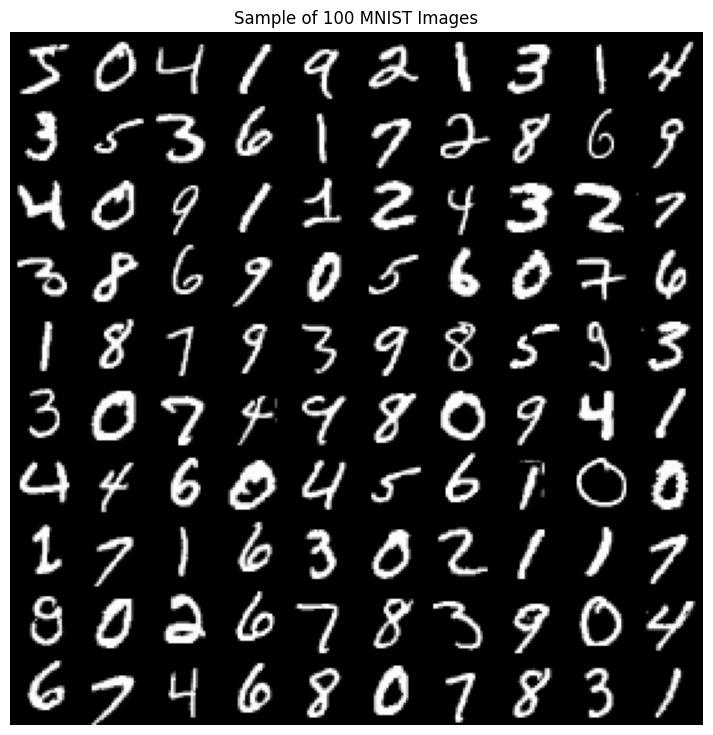

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Function to plot a grid of digit images
def plot_digits(instances, images_per_row=10, **options):
    size = 28  # MNIST images are 28x28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate(
        [instances, np.zeros((n_empty, size * size))], axis=0
    )
    grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap="gray", **options)
    plt.axis("off")

# Load the MNIST dataset
# X_train is training images and y_train are the labels 0-9
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display a grid of 100 sample images with their labels
plt.figure(figsize=(9, 9)) # 9x9 inches
example_images = X_train[:100].reshape(100, 28*28)  # Reshape for plot_digits
plot_digits(example_images, images_per_row=10)
plt.title("Sample of 100 MNIST Images")
plt.show()

# Initializing, training, and evaluating the best model

In [ ]:
# Preprocess the data
# Converts the 2d image to array and /255 for better training from pixel values
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

# Option 1: Stochastic Gradient Descent Classifier (iterates to minimize loss)
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd}")
print("SGD Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))

# Option 2: Random Forest Classifier (Decision trees)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Option 3: Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc}")
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SGD Classifier Accuracy: 0.9174
SGD Classifier Confusion Matrix:
 [[ 956    0    2    2    0    3   12    3    1    1]
 [   0 1112    3    1    0    3    5    1   10    0]
 [   8    5  934   13    6    2   14   13   33    4]
 [   5    0   26  902    2   30    3   13   21    8]
 [   1    3    5    0  888    0   20    5    8   52]
 [  12    3    1   24   12  777   24    5   27    7]
 [   7    3    6    2    6    7  925    0    2    0]
 [   2    8   23    3    7    1    1  949    3   31]
 [  12   12    8   17   15   38   11   14  834   13]
 [  10    8    2   17   28   12    0   27    8  897]]
Random Forest Accuracy: 0.9704
Random Forest Confusion Matrix:
 [[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0

# Visualizing the matrices using Heat maps

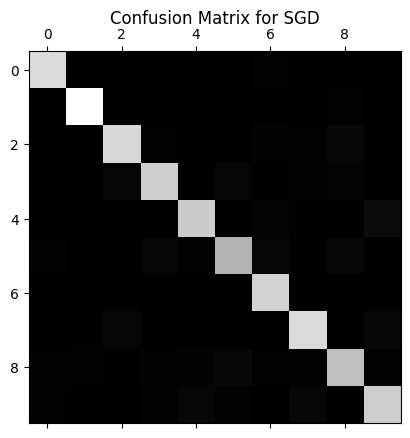

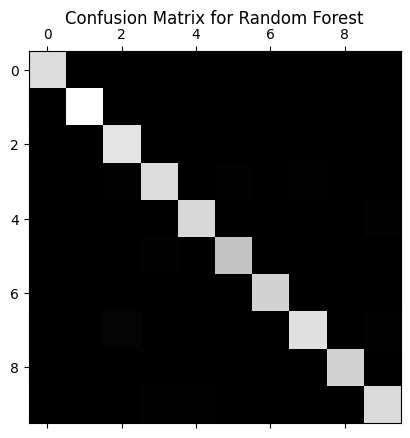

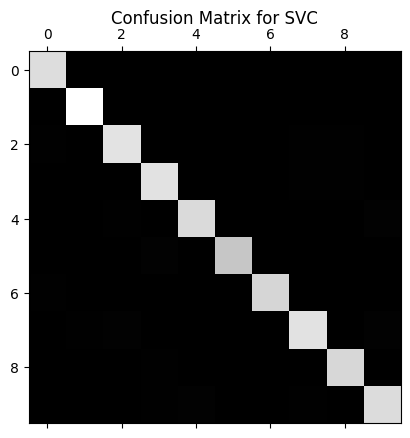

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
conf2_matrix = confusion_matrix(y_test, y_pred_rf)
conf3_matrix = confusion_matrix(y_test, y_pred_svc)

plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.title("Confusion Matrix for SGD", pad=20)
plt.show()

plt.matshow(conf2_matrix, cmap=plt.cm.gray)
plt.title("Confusion Matrix for Random Forest", pad=20)
plt.show()

plt.matshow(conf3_matrix, cmap=plt.cm.gray)
plt.title("Confusion Matrix for SVC", pad=20)
plt.show()

# Hyperparameter Tuning and Summary

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9802


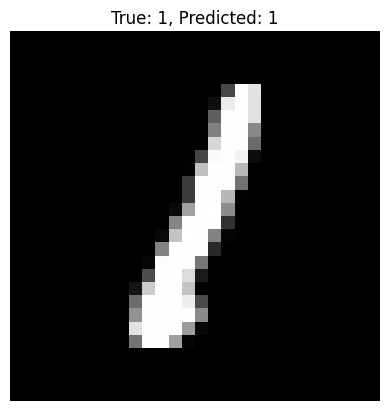

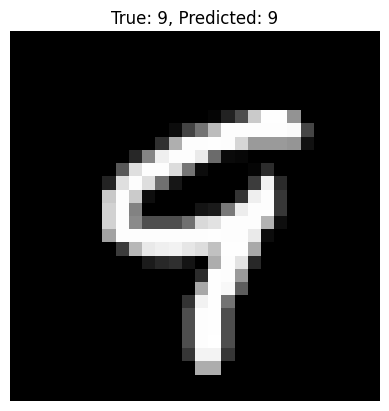

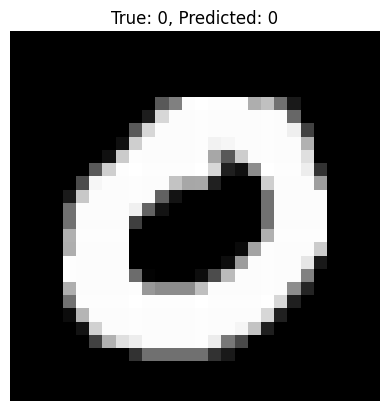

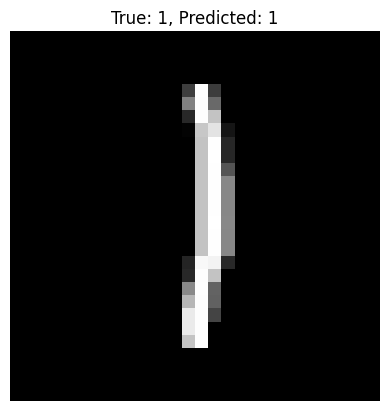

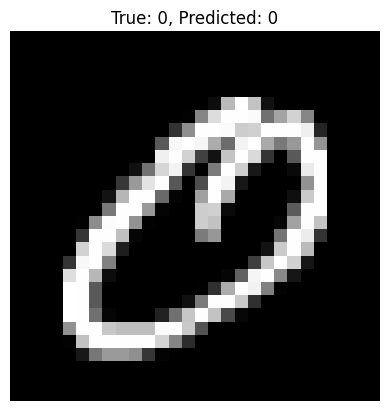

Classification Report for Best Model (SVM):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Summary of Model Performance:
SGD Classifier Accuracy: 0.9174
Random Forest Accuracy: 0.9704
SVM Accuracy: 0.9792
Best Model Hyperparameters: {'C': 10, 'kernel': 'rbf'}


In [ ]:
# Hyperparameter Tuning on SVM using Grid Search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict and visualize a few random samples
sample_indices = np.random.choice(len(X_test), 5, replace=False)
for i in sample_indices:
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred_svc[i]}")
    plt.axis('off')
    plt.show()

# Model performance evaluation
print("Classification Report for Best Model (SVM):")
print(classification_report(y_test, y_pred_svc))

# Summary of findings
print("Summary of Model Performance:")
print(f"SGD Classifier Accuracy: {accuracy_sgd}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"SVM Accuracy: {accuracy_svc}")
print("Best Model Hyperparameters:", grid_search.best_params_)